In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

import datetime

# Set color palette for Seaborn
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

In [2]:
items = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/order_items.csv")
reviews = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/order_reviews.csv")
orders = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/orders.csv")
products = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/products.csv")
geolocation = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/geolocation.csv")
sellers = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/sellers.csv")
payments = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/order_payments.csv")
customers = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/customers.csv")
category = pd.read_csv("/Users/alenjose/Desktop/data/eda_1/archive/product_category_name_translation.csv")

## Understanding Data and Cleaning Data

In [3]:
from IPython.display import display

# List of all DataFrames and their names
dataframes = {
    'items': items,
    'reviews': reviews,
    'orders': orders,
    'products': products,
    'geolocation': geolocation,
    'sellers': sellers,
    'payments': payments,
    'customers': customers,
    'category': category
}

# loop through each df and display head.
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    display(df.head())  # render
    print("\n")  


DataFrame: items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




DataFrame: reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




DataFrame: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




DataFrame: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




DataFrame: geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




DataFrame: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




DataFrame: payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




DataFrame: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




DataFrame: category


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
import io

for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print("\n")
    
    # capture df.info() to display
    buffer = io.StringIO()
    df.info(buf=buffer)
    info = buffer.getvalue()
    
    print(info)  # print captured info
    print("\n") 

DataFrame: items


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB



DataFrame: reviews


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   r

In [5]:
for name, df in dataframes.items():
    duplicates = df[df.duplicated()]
    duplicate_count = len(duplicates)
    print(f"{name} has {duplicate_count} duplicated rows.")
    if duplicate_count > 0:
        display(duplicates)
        print("\n")

items has 0 duplicated rows.
reviews has 0 duplicated rows.
orders has 0 duplicated rows.
products has 0 duplicated rows.
geolocation has 261831 duplicated rows.


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS




sellers has 0 duplicated rows.
payments has 0 duplicated rows.
customers has 0 duplicated rows.
category has 0 duplicated rows.


In [6]:
display(geolocation[geolocation.duplicated()].head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [7]:
# duplicates dropped 
geolocation_cleaned = geolocation.drop_duplicates().reset_index(drop=True)
print(geolocation_cleaned.duplicated().sum())

0


In [8]:
for name, df in dataframes.items():
    missing_values = df.isna().sum()
    if missing_values.any():  
        print(f"{name} has missing values:")
        print(missing_values[missing_values > 0]) # columns with missing values filtered
        print("\n")


reviews has missing values:
review_comment_title      87656
review_comment_message    58247
dtype: int64


orders has missing values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64


products has missing values:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64




In [9]:
# rows where one of the 2 cols have missing values
reviews.loc[reviews[['review_comment_title', 'review_comment_message']].isna().any(axis=1), 
                              ['review_comment_title', 'review_comment_message']]

,review_comment_title,review_comment_message
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,Recebi bem antes do prazo estipulado.
4,NaN,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,NaN,NaN
99220,NaN,NaN
99221,NaN,"Excelente mochila, entrega super rápida. Super..."
99222,NaN,NaN


In [10]:
# since there is no nulls in review score, all rows are kept for analysis
reviews.review_score.isna().sum()

0

In [11]:
products[products[['product_category_name', 'product_description_lenght']].isna().all(axis=1)].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [12]:
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)

In [13]:
# convert to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

In [14]:
# finding unique key for customers table
print(customers['customer_id'].nunique())          
print(customers['customer_unique_id'].nunique())

print(customers['customer_id'].duplicated().sum())          
print(customers['customer_unique_id'].duplicated().sum())   

99441
96096
0
3345


In [15]:
# first column set as the index
items.set_index(items.columns[0], inplace=True)
reviews.set_index(reviews.columns[0], inplace=True)
orders.set_index(orders.columns[0], inplace=True)
products.set_index(products.columns[0], inplace=True)
geolocation.set_index(geolocation.columns[0], inplace=True)
sellers.set_index(sellers.columns[0], inplace=True)
payments.set_index(payments.columns[0], inplace=True)
customers.set_index(customers.columns[0], inplace=True)
category.set_index(category.columns[0], inplace=True)

## EDA : 

### Basic Descriptive Analysis :

In [16]:
# unique orders
print("there are",orders.index.nunique(),"unique orders")

there are 99441 unique orders


In [17]:
# distribution of review scores
reviews.review_score.value_counts().sort_index()

1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_score, dtype: int64

In [18]:
(orders['order_purchase_timestamp'].dtype)

dtype('<M8[ns]')

In [19]:
# distribution of orders by year
orders['order_purchase_timestamp'].dt.year.value_counts().sort_index()

2016      329
2017    45101
2018    54011
Name: order_purchase_timestamp, dtype: int64

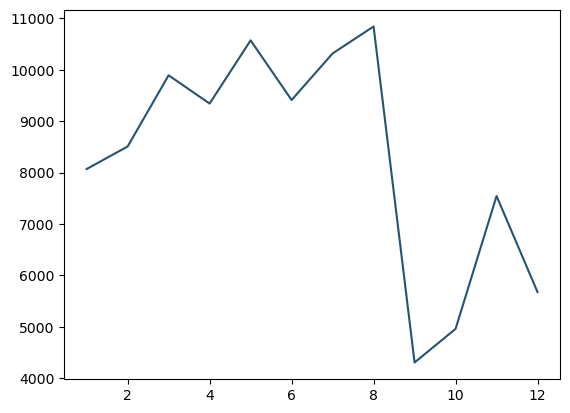

In [20]:
# distribution of orders by month
orders['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot(kind='line')
plt.show()

In [21]:
# understanding payments table in depth
print(orders.index.dtype)
print(payments.index.dtype)

print()

print(orders.index.is_unique)  
print(payments.index.is_unique) 

print()

payments.index.nunique()

object
object

True
False



99440

In [22]:
# show how many orders have 1, 2, 3, etc., payments
payments.groupby('order_id').size().value_counts()

1     96479
2      2382
3       301
4       108
5        52
6        36
7        28
8        11
9         9
11        8
12        8
10        5
13        3
15        2
14        2
19        2
22        1
21        1
26        1
29        1
dtype: int64

In [23]:
# group and agg bu order_id 
payments_aggregated = payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_type': lambda x: ', '.join(set(x)),  
    'payment_installments': 'sum'                
}).reset_index()

# add count as new column
payments_aggregated['payment_count'] = payments.groupby('order_id').size().values

# join orders table with agg payments, including payment_count
orders_payments = orders.join(payments_aggregated.set_index('order_id'), on='order_id', how='left')

orders_payments.sort_values(by='payment_count',ascending=False).head(6)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,payment_type,payment_installments,payment_count
order_id,,,,,,,,,,,
fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaT,2017-05-18,457.99,voucher,29.0,29.0
ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,62.68,"voucher, credit_card",26.0,26.0
285c2e15bebd4ac83635ccc563dc71f4,b246eeed30b362c09d867b9e598bee51,delivered,2017-12-08 12:00:04,2017-12-09 11:55:17,2017-12-11 18:42:21,2017-12-21 16:33:10,2018-01-03,40.85,"voucher, credit_card",22.0,22.0
895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,161.32,voucher,21.0,21.0
ee9ca989fc93ba09a6eddc250ce01742,eed931d3a5222a9a511d18be7fd2a5ba,delivered,2017-05-12 16:24:51,2017-05-12 16:35:21,2017-05-18 15:24:38,2017-05-24 12:26:59,2017-05-30,82.73,"voucher, credit_card",19.0,19.0
fedcd9f7ccdc8cba3a18defedd1a5547,13aa59158da63ba0e93ec6ac2c07aacb,delivered,2017-09-23 14:56:45,2017-09-25 17:44:41,2017-10-02 23:47:54,2017-10-18 22:35:50,2017-10-23,205.74,"voucher, credit_card",19.0,19.0


In [24]:
# merge orders and items df
df_orders_items = orders.merge(items, on='order_id', how='inner')

# merge above df with payments
df_orders_combined = df_orders_items.merge(payments, on='order_id', how='inner')

df_orders_combined.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [25]:
df_orders_combined.order_purchase_timestamp.dtype

dtype('<M8[ns]')

In [26]:
df_orders_combined['df_order_weekday'] = df_orders_combined.order_purchase_timestamp.dt.weekday  + 1 # 1 is monday

In [27]:
df_orders_combined['df_order_hour'] = df_orders_combined.order_purchase_timestamp.dt.hour
df_orders_combined['df_order_month'] = df_orders_combined.order_purchase_timestamp.dt.month
df_orders_combined['df_order_year'] = df_orders_combined.order_purchase_timestamp.dt.year

### Customer Behavior and Order Patterns

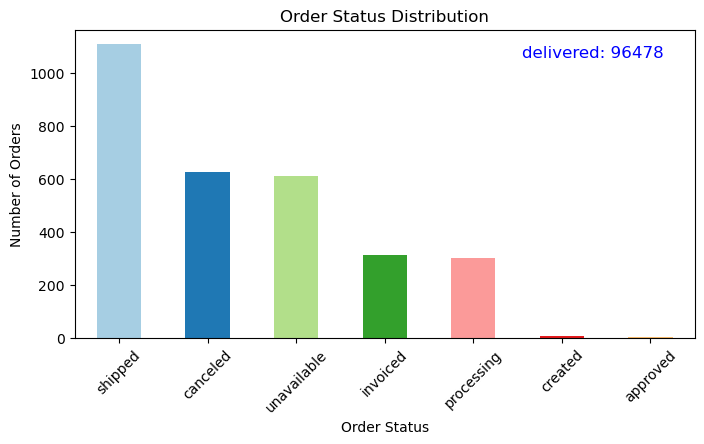

In [28]:
plt.figure(figsize=(8, 4))

order_status_counts = orders['order_status'].value_counts()
order_status_counts.iloc[1:].plot(kind='bar', color=plt.cm.Paired.colors)
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

most_common_status = order_status_counts.index[0]
most_common_count = order_status_counts.iloc[0]

plt.text(0.95, 0.95, f"{most_common_status}: {most_common_count}", 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()

In [37]:
pd.DataFrame(df_orders_combined.groupby(['df_order_year','df_order_month']).size())

0
df_order_year df_order_month      
2016          9                  3
              10               381
              12                 1
2017          1               1005
              2               2062
              3               3181
              4               2855
              5               4396
              6               3781
              7               4840
              8               5170
              9               5099
              10              5570
              11              9016
              12              6564
2018          1               8545
              2               7922
              3               8544
              4               8261
              5               8221
              6               7390
              7               7331
              8               7462
              9                  1

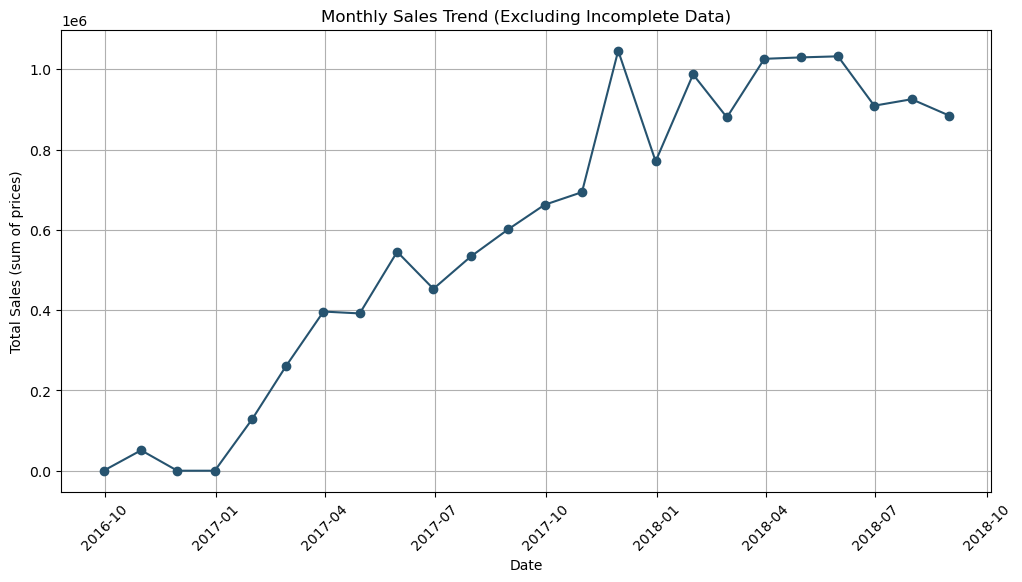

In [36]:
# monthly sales trend 
monthly_sales_trend = df_orders_combined.resample('M', on='order_purchase_timestamp')['price'].sum().reset_index()

# filter out the imcomplete month
monthly_sales_trend = monthly_sales_trend[~((monthly_sales_trend['order_purchase_timestamp'].dt.year == 2018) & 
                                            (monthly_sales_trend['order_purchase_timestamp'].dt.month == 9))]

# plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_trend['order_purchase_timestamp'], monthly_sales_trend['price'], marker='o')
plt.title("Monthly Sales Trend (Excluding Incomplete Data)")
plt.xlabel("Date")
plt.ylabel("Total Sales (sum of prices)")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [89]:
products_df = df_orders_combined.merge(products,on='product_id')
products_df.head(2)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,df_order_month,df_order_year,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,10,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,10,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


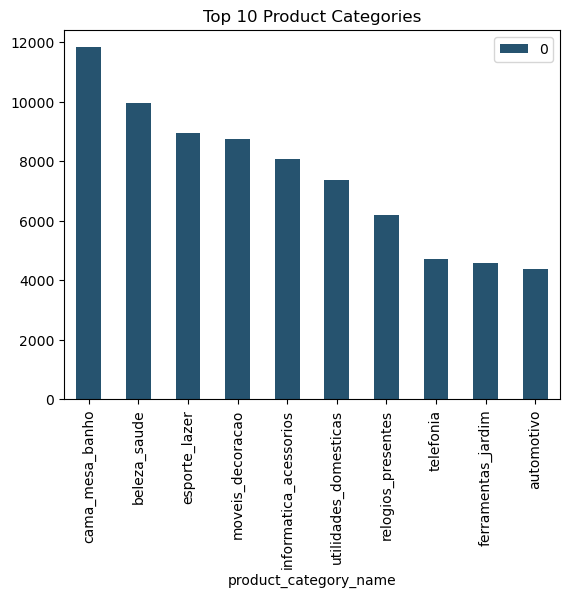

In [74]:
pd.DataFrame(products_df.groupby('product_category_name').size().sort_values(ascending=False).head(10)).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.show()

In [88]:
products_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(7)

product_category_name
beleza_saude              1297355.80
relogios_presentes        1253143.30
cama_mesa_banho           1092551.02
esporte_lazer             1023996.34
informatica_acessorios     942277.57
moveis_decoracao           765093.89
utilidades_domesticas      666587.00
Name: price, dtype: float64